In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tkinter as tk
from tkinter import filedialog

In [2]:
import pathlib
data_dir = pathlib.Path("Faces/train")

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

800


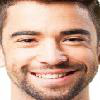

In [4]:
man = list(data_dir.glob('man/*.jpg'))
woman = list(data_dir.glob('woman/*.jpg'))
PIL.Image.open(str(man[0]))


In [5]:
batch_size = 16
img_height = 100
img_width = 100


In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split = 0.2, subset = "training", seed = 123,
    image_size = (img_height, img_width), batch_size = batch_size)

Found 800 files belonging to 2 classes.
Using 640 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split = 0.2, subset = "validation", seed = 123,
    image_size = (img_height, img_width), batch_size = batch_size)

Found 800 files belonging to 2 classes.
Using 160 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['man', 'woman']


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [10]:
num_class = 2

In [11]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(num_class)
])

noepochs = 14 

In [12]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  metrics = ['accuracy'])
mymodel = model.fit(train_ds, validation_data = val_ds, epochs = noepochs) 

Epoch 1/14
40/40 [==============================] - 8s 133ms/step - loss: 0.6812 - accuracy: 0.6047 - val_loss: 0.5876 - val_accuracy: 0.7000
Epoch 2/14
40/40 [==============================] - 4s 111ms/step - loss: 0.4728 - accuracy: 0.7906 - val_loss: 0.5206 - val_accuracy: 0.7188
Epoch 3/14
40/40 [==============================] - 4s 111ms/step - loss: 0.3831 - accuracy: 0.8234 - val_loss: 0.3973 - val_accuracy: 0.8188
Epoch 4/14
40/40 [==============================] - 5s 131ms/step - loss: 0.3098 - accuracy: 0.8781 - val_loss: 0.3829 - val_accuracy: 0.8375
Epoch 5/14
40/40 [==============================] - 5s 114ms/step - loss: 0.2586 - accuracy: 0.8922 - val_loss: 0.4141 - val_accuracy: 0.8250
Epoch 6/14
40/40 [==============================] - 5s 122ms/step - loss: 0.1757 - accuracy: 0.9375 - val_loss: 0.2920 - val_accuracy: 0.8562
Epoch 7/14
40/40 [==============================] - 4s 112ms/step - loss: 0.1678 - accuracy: 0.9359 - val_loss: 0.3307 - val_accuracy: 0.8562
Epoch 

In [13]:
acc = mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']
loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']
epochs_range = range(noepochs)


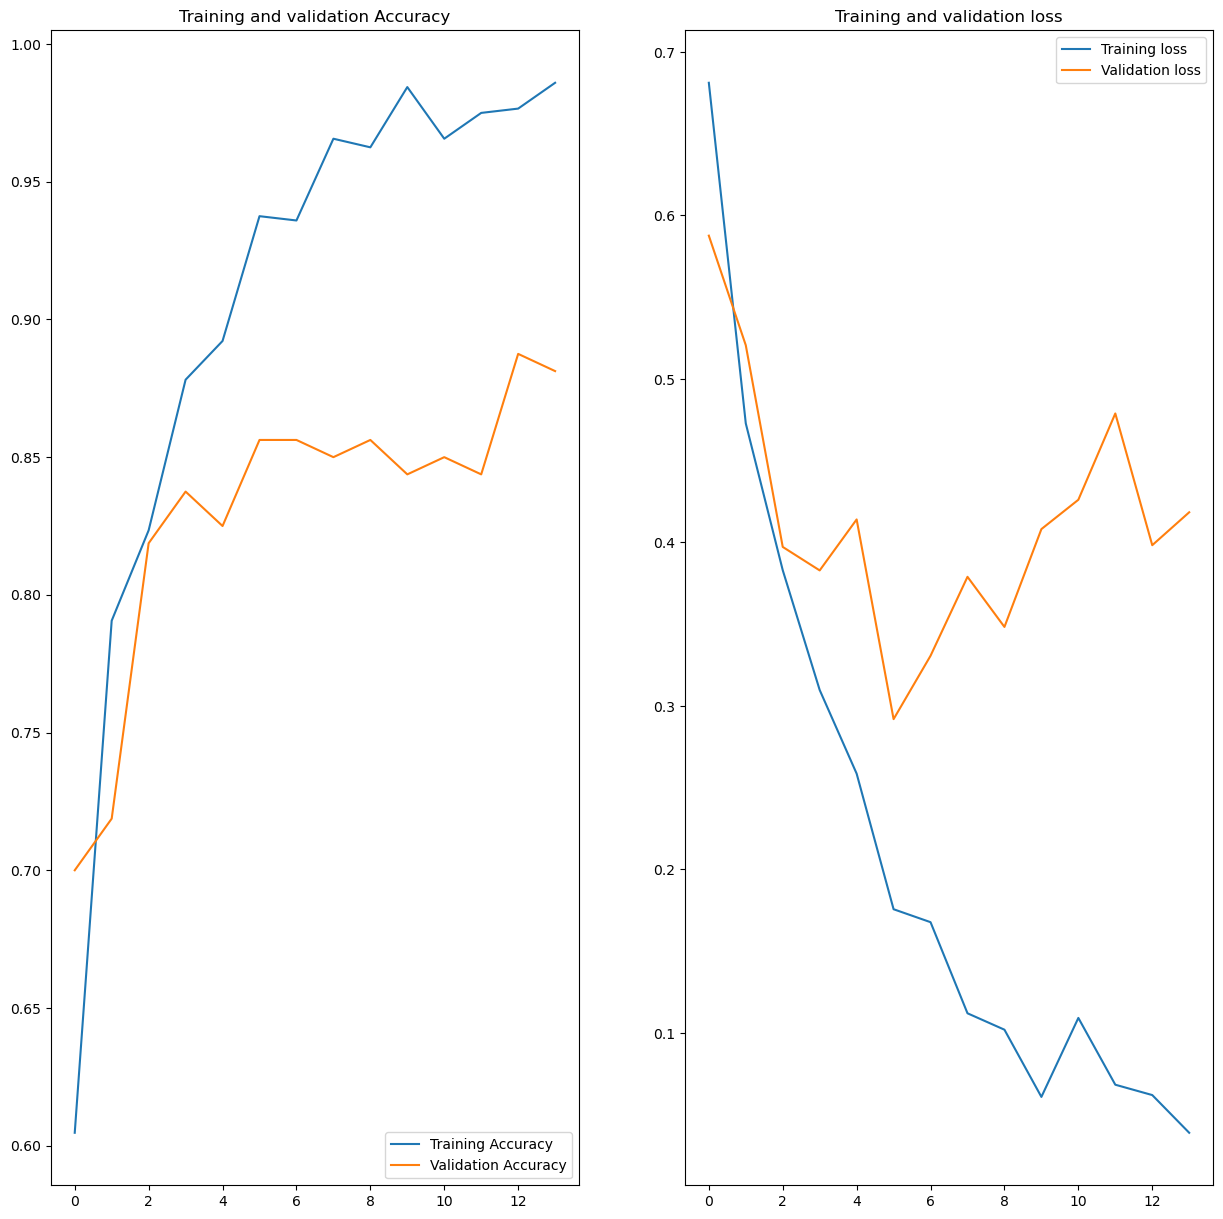

In [14]:
plt.figure(figsize=(15, 15)) #creates figure for the plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training loss')
plt.plot(epochs_range, val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

In [15]:
test_dir = pathlib.Path(r"C:\Users\damie\Downloads\ecole\Faces\test")

In [16]:
image_count = len(list(test_dir.glob('*.jpg')))
test = list(test_dir.glob('*.jpg'))
print(image_count)

8


In [29]:
np.set_printoptions(suppress=True)
for i in range(len(test)):
    img = keras.preprocessing.image.load_img(test[i], target_size = (img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print("Image "+str(i+1))
    for i in range(len(class_names)):
        print(class_names[i], score[i])

1/1 [==============================] - 0s 38ms/step
Image 1
man tf.Tensor(0.0006726589, shape=(), dtype=float32)
woman tf.Tensor(0.9993274, shape=(), dtype=float32)
1/1 [==============================] - 0s 55ms/step
Image 2
man tf.Tensor(1.805047e-06, shape=(), dtype=float32)
woman tf.Tensor(0.9999982, shape=(), dtype=float32)
1/1 [==============================] - 0s 43ms/step
Image 3
man tf.Tensor(1.0, shape=(), dtype=float32)
woman tf.Tensor(1.1745315e-08, shape=(), dtype=float32)
1/1 [==============================] - 0s 35ms/step
Image 4
man tf.Tensor(1.0, shape=(), dtype=float32)
woman tf.Tensor(2.6180535e-11, shape=(), dtype=float32)
1/1 [==============================] - 0s 39ms/step
Image 5
man tf.Tensor(0.9999895, shape=(), dtype=float32)
woman tf.Tensor(1.0504308e-05, shape=(), dtype=float32)
1/1 [==============================] - 0s 44ms/step
Image 6
man tf.Tensor(1.0, shape=(), dtype=float32)
woman tf.Tensor(2.6042903e-09, shape=(), dtype=float32)
1/1 [===================